### Load

In [2]:
# load libraries
import numpy as np 
seed = 5
np.random.seed(seed) # for reproducibility

import pandas as pd 
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Input,Dropout
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns 

In [3]:
# import data
x_features = np.load('X.npy')
y_labels = np.load('Y.npy')

### Data exploration

In [4]:
# data exploration
print('shape of the features =', x_features.shape)
print('shape of the lables =', y_labels.shape)

shape of the features = (5547, 50, 50, 3)
shape of the lables = (5547,)


In [5]:
# check if the data is balanced 
# print statistics
print('Number of positive cases: {}'.format(np.sum(y_labels==1)))
print('Number of negative cases: {}'.format(np.sum(y_labels==0)))
print('Percentage of positive cases: {:.2f}%'.format(np.mean(y_labels)*100))
print('Percentage of negative cases: {:.2f}%'.format(100 - (np.mean(y_labels)*100)))

Number of positive cases: 2788
Number of negative cases: 2759
Percentage of positive cases: 50.26%
Percentage of negative cases: 49.74%


          Count
Positive   2788
Negative   2759


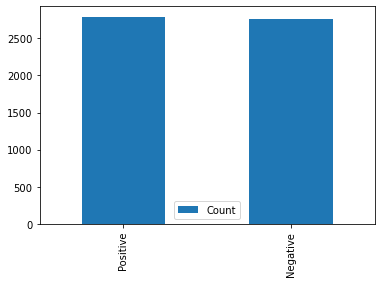

In [6]:
### plot this as a bar plot
# assign in categories
positive = np.sum(y_labels == 1)
negative = np.sum(y_labels == 0)

# save as an array
my_array = np.array([positive, negative])
df = pd.DataFrame(my_array, columns = ['Count'], index = ['Positive', 'Negative'])
print(df)

df.plot.bar(y='Count')
# the dataset is balanced as we have about the same count of positive and negative cases

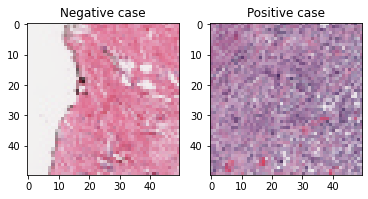

In [7]:
# View a random positive and negative images
# shuffle data
shuffle_array = np.arange(len(x_features))
np.random.shuffle(shuffle_array)
x_features = x_features[shuffle_array]
y_labels = y_labels[shuffle_array]

# view the 20th and 30th images negative and positive image resp.
positive_images = x_features[y_labels == 1]
negative_images = x_features[y_labels == 0]

# negative case
plt.subplot(1,2, 1)
plt.title('Negative case')
plt.imshow(negative_images[20])
# positive case
plt.subplot(1,2, 2)
plt.title('Positive case')
plt.imshow(positive_images[30])

Text(0, 0.5, 'Count')

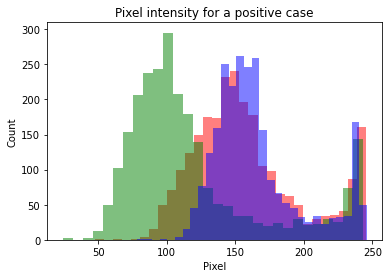

In [8]:
# explore pixel intensity for one positive case
plt.hist(positive_images[1,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
plt.hist(positive_images[1,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
plt.hist(positive_images[1,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);
plt.title('Pixel intensity for a positive case')
plt.xlabel('Pixel')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

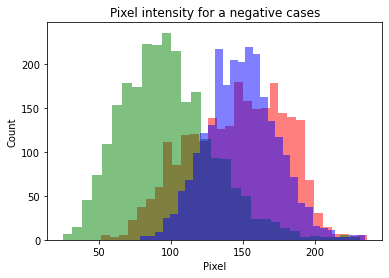

In [9]:
plt.hist(negative_images[1,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
plt.hist(negative_images[1,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
plt.hist(negative_images[1,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);
plt.title('Pixel intensity for a negative cases')
plt.xlabel('Pixel')
plt.ylabel('Count')

In [10]:
# rbg propertises of the whole images
print('red: mean/std = %.2f/%.2f'%(x_features[:,:,:,0].mean(), x_features[:,:,:,0].std()))
print('green: mean/std = %.2f/%.2f'%(x_features[:,:,:,1].mean(), x_features[:,:,:,1].std()))
print('blue: mean/std = %.2f/%.2f'%(x_features[:,:,:,2].mean(), x_features[:,:,:,2].std()))

red: mean/std = 205.79/36.29
green: mean/std = 161.87/53.94
blue: mean/std = 187.44/38.69


In [11]:
# rbg propertises of the negative images
print('red: mean/std = %.2f/%.2f'%(negative_images[:,:,:,0].mean(), negative_images[:,:,:,0].std()))
print('green: mean/std = %.2f/%.2f'%(negative_images[:,:,:,1].mean(), negative_images[:,:,:,1].std()))
print('blue: mean/std = %.2f/%.2f'%(negative_images[:,:,:,2].mean(), negative_images[:,:,:,2].std()))

red: mean/std = 218.09/30.49
green: mean/std = 177.35/52.98
blue: mean/std = 197.39/38.80


In [12]:
# rbg propertises of the positive images
print('red: mean/std = %.2f/%.2f'%(positive_images[:,:,:,0].mean(), positive_images[:,:,:,0].std()))
print('green: mean/std = %.2f/%.2f'%(positive_images[:,:,:,1].mean(), positive_images[:,:,:,1].std()))
print('blue: mean/std = %.2f/%.2f'%(positive_images[:,:,:,2].mean(), positive_images[:,:,:,2].std()))

red: mean/std = 193.62/37.45
green: mean/std = 146.55/50.39
blue: mean/std = 177.60/35.97


### Data preprocessing

Min pixel value: 2.000, Max pixel value: 255.000


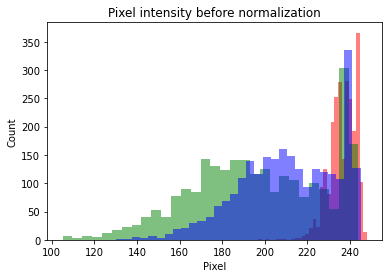

In [13]:
# check pixel intensity of the whole images before preprocessing
plt.hist(x_features[1,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
plt.hist(x_features[1,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
plt.hist(x_features[1,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);
plt.title('Pixel intensity before normalization')
plt.xlabel('Pixel')
plt.ylabel('Count')
print('Min pixel value: %.3f, Max pixel value: %.3f' % (x_features.min(), x_features.max()))

In [14]:
# split test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x_features, y_labels, test_size = 0.25, 
                                                   random_state = 5)

print('Shape of Train set:', X_train.shape)
print('Shape of Test set:', X_test.shape)
print('Shape of Train labels:' , y_train.shape)
print('Shape of Test lables:', y_test.shape)

Shape of Train set: (4160, 50, 50, 3)
Shape of Test set: (1387, 50, 50, 3)
Shape of Train labels: (4160,)
Shape of Test lables: (1387,)


X Shape: (4160, 50, 50, 3)


Text(0, 0.5, 'Count')

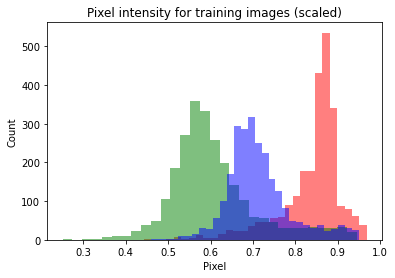

In [15]:
#Normalization of train set
X_train = X_train / 255.0
print("X Shape:",X_train.shape)

plt.hist(X_train[1,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
plt.hist(X_train[1,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
plt.hist(X_train[1,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);
plt.title('Pixel intensity for training images (scaled)')
plt.xlabel('Pixel')
plt.ylabel('Count')
# images are now scaled from 0 to 1

X Shape: (1387, 50, 50, 3)


Text(0, 0.5, 'Count')

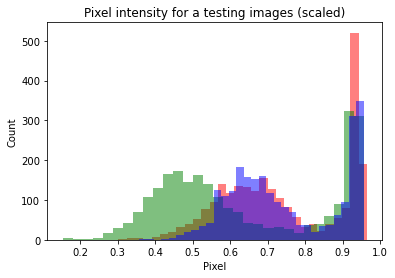

In [16]:
#Normalization of test set
X_test = X_test / 255.0
print("X Shape:",X_test.shape)

plt.hist(X_test[1,:,:,0].flatten(), bins=30, lw = 0,color='r', alpha=0.5);
plt.hist(X_test[1,:,:,1].flatten(), bins=30, lw = 0, color='g', alpha=0.5);
plt.hist(X_test[1,:,:,2].flatten(), bins=30, lw = 0, color='b', alpha=0.5);
plt.title('Pixel intensity for a testing images (scaled)')
plt.xlabel('Pixel')
plt.ylabel('Count')
# images are now scaled from 0 to 1

### Data modelling

In [33]:
# Model 1: CNN
model1 = Sequential()
model1.add(Conv2D(32, (3,3), input_shape=(50,50,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Conv2D(32, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Flatten())
model1.add(Dense(units=512, activation='relu'))
model1.add(Dense(units=2, activation='sigmoid'))
# compiling
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1982976   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [34]:
# fit the model
history = model1.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test))

Train on 4160 samples, validate on 1387 samples
Epoch 1/50
4160/4160 [==============================] - 4s 1ms/sample - loss: 0.6190 - accuracy: 0.6589 - val_loss: 0.5893 - val_accuracy: 0.7426
Epoch 2/50
4160/4160 [==============================] - 4s 993us/sample - loss: 0.5418 - accuracy: 0.7351 - val_loss: 0.5130 - val_accuracy: 0.7707
Epoch 3/50
4160/4160 [==============================] - 4s 980us/sample - loss: 0.5402 - accuracy: 0.7339 - val_loss: 0.5190 - val_accuracy: 0.7520
Epoch 4/50
4160/4160 [==============================] - 4s 983us/sample - loss: 0.5026 - accuracy: 0.7599 - val_loss: 0.5383 - val_accuracy: 0.7498
Epoch 5/50
4160/4160 [==============================] - 4s 986us/sample - loss: 0.5210 - accuracy: 0.7447 - val_loss: 0.5104 - val_accuracy: 0.7585
Epoch 6/50
4160/4160 [==============================] - 4s 1ms/sample - loss: 0.4906 - accuracy: 0.7697 - val_loss: 0.5266 - val_accuracy: 0.7686
Epoch 7/50
4160/4160 [==============================] - 4s 1ms/sampl

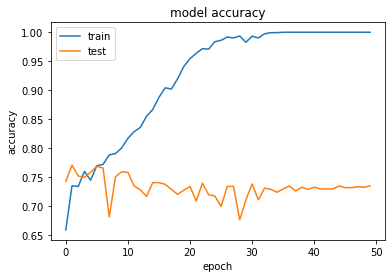

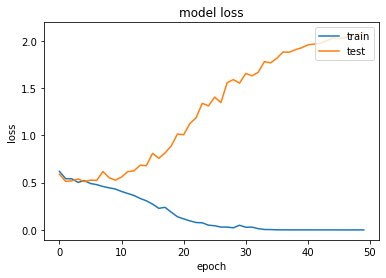

In [35]:
# visualize the results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [36]:
score = model1.evaluate(X_test, y_test, verbose=0)
print('\nKeras CNN #1 - accuracy:', score[1], '\n')

y_preds = model1.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #1 - accuracy: 0.73467916 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       712
           1       0.71      0.77      0.74       675

    accuracy                           0.73      1387
   macro avg       0.74      0.74      0.73      1387
weighted avg       0.74      0.73      0.73      1387



Text(91.68, 0.5, 'true label or ground truth')

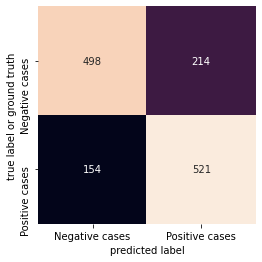

In [37]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

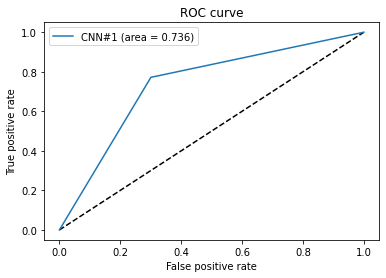

In [38]:
# plotting ROC 
fpr_cnn1, tpr_cnn1, thresholds_cnn1 = roc_curve(y_test, y_preds)
auc_cnn1 = auc(fpr_cnn1, tpr_cnn1)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn1, tpr_cnn1, label='CNN#1 (area = {:.3f})'.format(auc_cnn1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

From the results of the model, the model's train accuracy was increasing while the test accuracy was decreasing. This shows that the model was overfitting. One reason could be due to insufficient number of train sets. We could augument the dataset by generating new images using imagedatagenerator to see if the accuracy improves.

Before that though, let's add some Dropuout layer to this architecture and re-evaluate the model.
We can also use a bigger proportion of our dataset for training (ie 85% train-test split)

In [39]:
# add a dropout layer
model2 = Sequential()
model2.add(Conv2D(32, (3,3), input_shape=(50,50,3), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=2, activation='sigmoid'))
# compiling
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

In [40]:
# split test and train sets
# use 85% for training

X_train, X_test, y_train, y_test =train_test_split(x_features, y_labels, test_size = 0.15, 
                                                   random_state = 5)

#Normalization
X_train = X_train / 255.0
print('X Shape:', X_train.shape)

X_test = X_test / 255.0
print('X Shape:', X_test.shape)

X Shape: (4714, 50, 50, 3)
X Shape: (833, 50, 50, 3)


In [41]:
# fit the model
history = model2.fit(X_train, y_train, epochs = 50, validation_data=(X_test, y_test), shuffle = False)

Train on 4714 samples, validate on 833 samples
Epoch 1/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.6603 - accuracy: 0.6071 - val_loss: 0.6019 - val_accuracy: 0.7275
Epoch 2/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.5580 - accuracy: 0.7253 - val_loss: 0.5357 - val_accuracy: 0.7539
Epoch 3/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.5322 - accuracy: 0.7450 - val_loss: 0.5209 - val_accuracy: 0.7671
Epoch 4/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.5187 - accuracy: 0.7573 - val_loss: 0.5164 - val_accuracy: 0.7551
Epoch 5/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.5082 - accuracy: 0.7569 - val_loss: 0.5181 - val_accuracy: 0.7479
Epoch 6/50
4714/4714 [==============================] - 5s 1ms/sample - loss: 0.4995 - accuracy: 0.7590 - val_loss: 0.5156 - val_accuracy: 0.7503
Epoch 7/50
4714/4714 [==============================] - 5s 1ms/sample - loss:

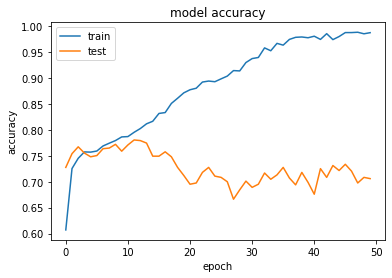

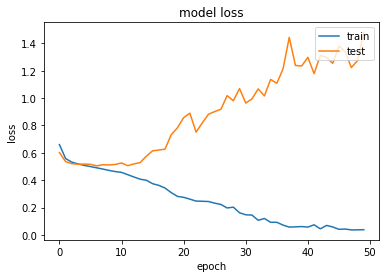

In [42]:
# visualize the results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

This did not help

Let's augument the images by adding several transformations of the original images

In [43]:
#Image Generator
datagen = ImageDataGenerator(
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        zoom_range=0.05,
        fill_mode='nearest'
  ) 
datagen.fit(X_train)

In [44]:
# split test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x_features, y_labels, test_size = 0.25, random_state = 5)


#Normalization
X_train = X_train / 255.0
print('X Shape:', X_train.shape)

X_test = X_test / 255.0
print('X Shape:', X_test.shape)

X Shape: (4160, 50, 50, 3)
X Shape: (1387, 50, 50, 3)


In [46]:
# fit model
history = model2.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, 
                    validation_data = (X_test, y_test), verbose = 2, shuffle=True) 

  ...
    to  
  ['...']
Train for 65 steps, validate on 1387 samples
Epoch 1/50
65/65 - 4s - loss: 0.5202 - accuracy: 0.7673 - val_loss: 0.4654 - val_accuracy: 0.7830
Epoch 2/50
65/65 - 4s - loss: 0.5013 - accuracy: 0.7608 - val_loss: 0.4549 - val_accuracy: 0.7967
Epoch 3/50
65/65 - 4s - loss: 0.5009 - accuracy: 0.7654 - val_loss: 0.4488 - val_accuracy: 0.7902
Epoch 4/50
65/65 - 4s - loss: 0.4846 - accuracy: 0.7685 - val_loss: 0.4806 - val_accuracy: 0.7765
Epoch 5/50
65/65 - 4s - loss: 0.4862 - accuracy: 0.7757 - val_loss: 0.4491 - val_accuracy: 0.7902
Epoch 6/50
65/65 - 4s - loss: 0.4893 - accuracy: 0.7738 - val_loss: 0.4523 - val_accuracy: 0.7902
Epoch 7/50
65/65 - 4s - loss: 0.4847 - accuracy: 0.7721 - val_loss: 0.4556 - val_accuracy: 0.7931
Epoch 8/50
65/65 - 4s - loss: 0.4858 - accuracy: 0.7712 - val_loss: 0.4460 - val_accuracy: 0.7916
Epoch 9/50
65/65 - 4s - loss: 0.4794 - accuracy: 0.7740 - val_loss: 0.4451 - val_accuracy: 0.8003
Epoch 10/50
65/65 - 4s - loss: 0.4793 - accuracy

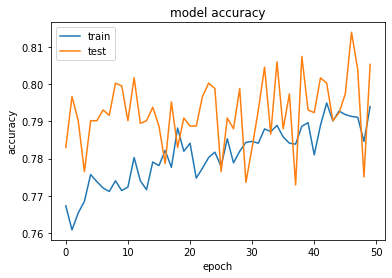

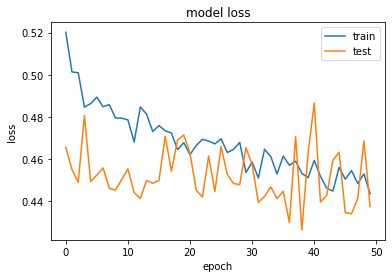

In [47]:
# visualize the results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [48]:
score = model2.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #2 - accuracy:', score[1], '\n')

y_preds = model2.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #2 - accuracy: 0.8053353 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       712
           1       0.80      0.79      0.80       675

    accuracy                           0.81      1387
   macro avg       0.81      0.81      0.81      1387
weighted avg       0.81      0.81      0.81      1387



Text(91.68, 0.5, 'true label or ground truth')

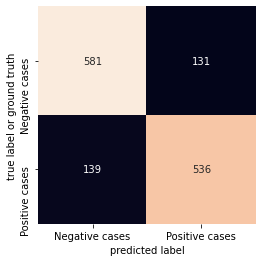

In [49]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

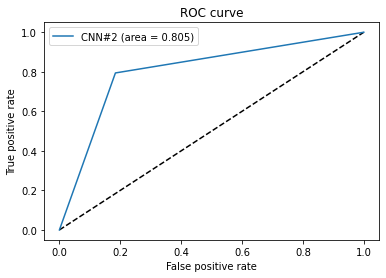

In [50]:
# plotting ROC 
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_test, y_preds)
auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN#2 (area = {:.3f})'.format(auc_cnn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

This model gave a better performance but needs more epochs to converge
Running again with 100 epochs

In [51]:
# fit model
history = model2.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=100, 
                    validation_data = (X_test, y_test), verbose = 2, shuffle=True) 

  ...
    to  
  ['...']
Train for 65 steps, validate on 1387 samples
Epoch 1/100
65/65 - 4s - loss: 0.4591 - accuracy: 0.7837 - val_loss: 0.4525 - val_accuracy: 0.7938
Epoch 2/100
65/65 - 4s - loss: 0.4535 - accuracy: 0.7877 - val_loss: 0.4535 - val_accuracy: 0.7844
Epoch 3/100
65/65 - 4s - loss: 0.4504 - accuracy: 0.7921 - val_loss: 0.4583 - val_accuracy: 0.7866
Epoch 4/100
65/65 - 4s - loss: 0.4424 - accuracy: 0.7971 - val_loss: 0.4544 - val_accuracy: 0.8075
Epoch 5/100
65/65 - 4s - loss: 0.4493 - accuracy: 0.7911 - val_loss: 0.4582 - val_accuracy: 0.7880
Epoch 6/100
65/65 - 4s - loss: 0.4497 - accuracy: 0.7978 - val_loss: 0.4492 - val_accuracy: 0.7988
Epoch 7/100
65/65 - 4s - loss: 0.4427 - accuracy: 0.7937 - val_loss: 0.4387 - val_accuracy: 0.7981
Epoch 8/100
65/65 - 4s - loss: 0.4458 - accuracy: 0.7925 - val_loss: 0.4330 - val_accuracy: 0.7974
Epoch 9/100
65/65 - 4s - loss: 0.4498 - accuracy: 0.7894 - val_loss: 0.4849 - val_accuracy: 0.7592
Epoch 10/100
65/65 - 4s - loss: 0.4530 

Epoch 82/100
65/65 - 4s - loss: 0.4064 - accuracy: 0.8139 - val_loss: 0.4666 - val_accuracy: 0.7866
Epoch 83/100
65/65 - 4s - loss: 0.4057 - accuracy: 0.8115 - val_loss: 0.4493 - val_accuracy: 0.7924
Epoch 84/100
65/65 - 4s - loss: 0.4038 - accuracy: 0.8147 - val_loss: 0.4657 - val_accuracy: 0.7938
Epoch 85/100
65/65 - 4s - loss: 0.4108 - accuracy: 0.8113 - val_loss: 0.4477 - val_accuracy: 0.8097
Epoch 86/100
65/65 - 4s - loss: 0.4031 - accuracy: 0.8137 - val_loss: 0.4474 - val_accuracy: 0.8003
Epoch 87/100
65/65 - 4s - loss: 0.4073 - accuracy: 0.8084 - val_loss: 0.4580 - val_accuracy: 0.8025
Epoch 88/100
65/65 - 4s - loss: 0.3910 - accuracy: 0.8212 - val_loss: 0.5021 - val_accuracy: 0.7758
Epoch 89/100
65/65 - 4s - loss: 0.4101 - accuracy: 0.8154 - val_loss: 0.4594 - val_accuracy: 0.7938
Epoch 90/100
65/65 - 4s - loss: 0.4058 - accuracy: 0.8101 - val_loss: 0.4513 - val_accuracy: 0.8003
Epoch 91/100
65/65 - 4s - loss: 0.4087 - accuracy: 0.8154 - val_loss: 0.4448 - val_accuracy: 0.8010


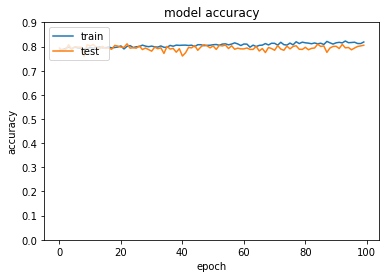

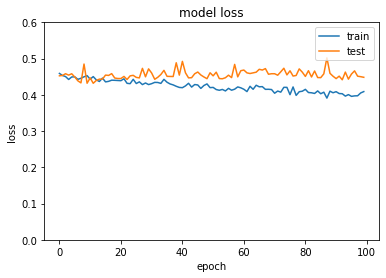

In [54]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0, 0.9)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0, 0.6)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [53]:
score = model2.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #2 - accuracy:', score[1], '\n')

y_preds = model2.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #2 - accuracy: 0.8053353 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       712
           1       0.79      0.81      0.80       675

    accuracy                           0.81      1387
   macro avg       0.81      0.81      0.81      1387
weighted avg       0.81      0.81      0.81      1387



Text(91.68, 0.5, 'true label or ground truth')

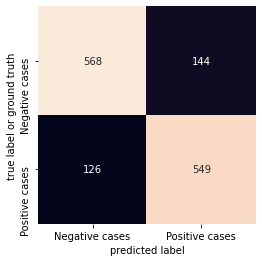

In [55]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

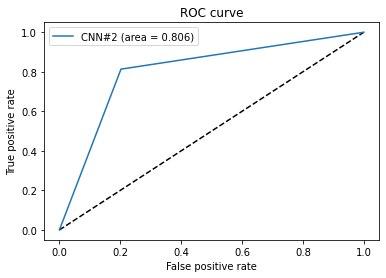

In [56]:
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_test, y_preds)
auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN#2 (area = {:.3f})'.format(auc_cnn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# I am thinking the model overtrained...

In [57]:
# adding a early stopping such that the model stops training when accuracy gets to 0.81 
accuracy_threshold = 0.8050
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= accuracy_threshold) :
            print('\nReached 81% accuracy, stopping training!')
            self.model.stop_training = True
callbacks = myCallback()

In [58]:
history = model2.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=100, 
                    validation_data = (X_test, y_test), verbose = 2, shuffle=True, callbacks = [callbacks]) 

  ...
    to  
  ['...']
Train for 65 steps, validate on 1387 samples
Epoch 1/100
65/65 - 4s - loss: 0.3920 - accuracy: 0.8250 - val_loss: 0.4670 - val_accuracy: 0.8003
Epoch 2/100
65/65 - 4s - loss: 0.4035 - accuracy: 0.8144 - val_loss: 0.4761 - val_accuracy: 0.7844
Epoch 3/100
65/65 - 4s - loss: 0.3971 - accuracy: 0.8224 - val_loss: 0.5017 - val_accuracy: 0.7873
Epoch 4/100
65/65 - 4s - loss: 0.3912 - accuracy: 0.8163 - val_loss: 0.4617 - val_accuracy: 0.7888
Epoch 5/100
65/65 - 4s - loss: 0.4025 - accuracy: 0.8142 - val_loss: 0.4882 - val_accuracy: 0.7664
Epoch 6/100
65/65 - 4s - loss: 0.3939 - accuracy: 0.8132 - val_loss: 0.4630 - val_accuracy: 0.7924
Epoch 7/100
65/65 - 4s - loss: 0.3867 - accuracy: 0.8216 - val_loss: 0.4729 - val_accuracy: 0.7960
Epoch 8/100
65/65 - 4s - loss: 0.4024 - accuracy: 0.8180 - val_loss: 0.4701 - val_accuracy: 0.7787
Epoch 9/100
65/65 - 4s - loss: 0.3984 - accuracy: 0.8183 - val_loss: 0.4648 - val_accuracy: 0.7938
Epoch 10/100
65/65 - 4s - loss: 0.3870 

In [59]:
score = model2.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #2 - accuracy:', score[1], '\n')

y_preds = model2.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #2 - accuracy: 0.80605626 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       712
           1       0.77      0.87      0.81       675

    accuracy                           0.81      1387
   macro avg       0.81      0.81      0.81      1387
weighted avg       0.81      0.81      0.81      1387



Text(91.68, 0.5, 'true label or ground truth')

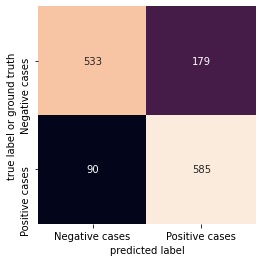

In [60]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

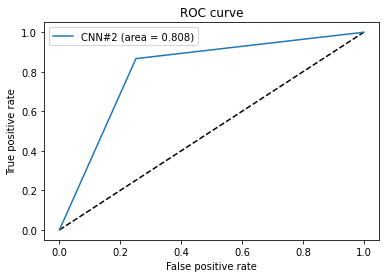

In [61]:
# plotting ROC 
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(y_test, y_preds)
auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN#2 (area = {:.3f})'.format(auc_cnn2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Model performance is better. The model has stopped overfitting. 
Looking to improve make this model deeper and see if the model improves.
Adding another conv2D and maxpooling layers

In [62]:
# adding another Conv2D and MaxPooling2D layer
model3 = Sequential()
model3.add(Conv2D(64, (3,3), input_shape=(50,50,3), activation='relu'))
model3.add(MaxPooling2D(2,2))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(2, 2))
model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(2, 2))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=2, activation='sigmoid'))
# compiling
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 32)         

In [63]:
datagen = ImageDataGenerator(
        rotation_range=45,  # randomly rotate images by 45 degrees
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        zoom_range=0.05,
        fill_mode='nearest'
  ) 
datagen.fit(X_train)

In [64]:
# fit model
seed = 1234
np.random.seed(seed)
history = model3.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, 
                    validation_data = (X_test, y_test), verbose = 2, shuffle=True) 

  ...
    to  
  ['...']
Train for 65 steps, validate on 1387 samples
Epoch 1/50
65/65 - 6s - loss: 0.6528 - accuracy: 0.6077 - val_loss: 0.5895 - val_accuracy: 0.7116
Epoch 2/50
65/65 - 6s - loss: 0.6099 - accuracy: 0.6834 - val_loss: 0.5846 - val_accuracy: 0.7015
Epoch 3/50
65/65 - 5s - loss: 0.5812 - accuracy: 0.7147 - val_loss: 0.5618 - val_accuracy: 0.7304
Epoch 4/50
65/65 - 6s - loss: 0.5732 - accuracy: 0.7115 - val_loss: 0.5991 - val_accuracy: 0.6986
Epoch 5/50
65/65 - 5s - loss: 0.5519 - accuracy: 0.7298 - val_loss: 0.5595 - val_accuracy: 0.7304
Epoch 6/50
65/65 - 5s - loss: 0.5562 - accuracy: 0.7300 - val_loss: 0.5498 - val_accuracy: 0.7332
Epoch 7/50
65/65 - 6s - loss: 0.5449 - accuracy: 0.7413 - val_loss: 0.5604 - val_accuracy: 0.7253
Epoch 8/50
65/65 - 6s - loss: 0.5661 - accuracy: 0.7204 - val_loss: 0.5344 - val_accuracy: 0.7455
Epoch 9/50
65/65 - 6s - loss: 0.5386 - accuracy: 0.7409 - val_loss: 0.6176 - val_accuracy: 0.6633
Epoch 10/50
65/65 - 6s - loss: 0.5355 - accuracy

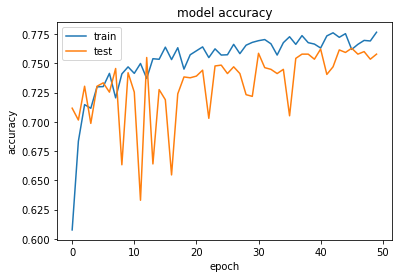

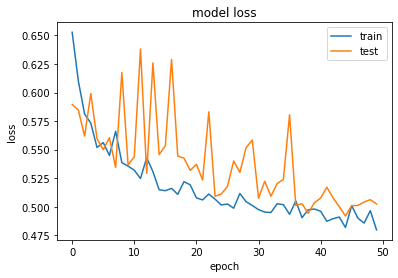

In [65]:
# visualize the results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [66]:
score = model3.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #3 - accuracy:', score[1], '\n')

y_preds = model3.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #3 - accuracy: 0.7577505 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       712
           1       0.78      0.70      0.74       675

    accuracy                           0.76      1387
   macro avg       0.76      0.76      0.76      1387
weighted avg       0.76      0.76      0.76      1387



Text(91.68, 0.5, 'true label or ground truth')

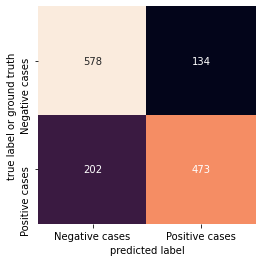

In [67]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

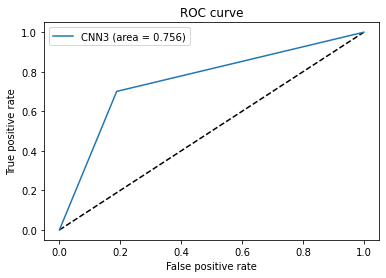

In [68]:
# plotting ROC 
fpr_cnn3, tpr_cnn3, thresholds_cnn3 = roc_curve(y_test, y_preds)
auc_cnn3 = auc(fpr_cnn3, tpr_cnn3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn3, tpr_cnn3, label='CNN3 (area = {:.3f})'.format(auc_cnn3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Using a a different train test split

In [70]:
# trying a 80% train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(x_features, y_labels, test_size = 0.20, 
                                                   random_state = 5)

#Normalization
X_train = X_train / 255.0
print('X Shape:', X_train.shape)

X_test = X_test / 255.0
print('X Shape:', X_test.shape)

X Shape: (4437, 50, 50, 3)
X Shape: (1110, 50, 50, 3)


In [71]:
datagen = ImageDataGenerator(
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        zoom_range=0.05,
        fill_mode='nearest'
  ) 
datagen.fit(X_train)

In [73]:
# adding a early stopping such that the model stops training when val_accuracy gets to 0.79
accuracy_threshold = 0.8000
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= accuracy_threshold) :
            print('\nReached 79% accuracy, stopping training!')
            self.model.stop_training = True
callbacks = myCallback()

In [74]:
# fit model
history = model3.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50,
                    validation_data = (X_test, y_test), verbose = 2, callbacks = [callbacks])

  ...
    to  
  ['...']
Train for 70 steps, validate on 1110 samples
Epoch 1/50
70/70 - 6s - loss: 0.4802 - accuracy: 0.7757 - val_loss: 0.4813 - val_accuracy: 0.7658
Epoch 2/50
70/70 - 6s - loss: 0.4842 - accuracy: 0.7739 - val_loss: 0.5074 - val_accuracy: 0.7495
Epoch 3/50
70/70 - 6s - loss: 0.4892 - accuracy: 0.7681 - val_loss: 0.4989 - val_accuracy: 0.7631
Epoch 4/50
70/70 - 6s - loss: 0.4800 - accuracy: 0.7712 - val_loss: 0.4796 - val_accuracy: 0.7568
Epoch 5/50
70/70 - 6s - loss: 0.4784 - accuracy: 0.7726 - val_loss: 0.5655 - val_accuracy: 0.7018
Epoch 6/50
70/70 - 6s - loss: 0.4816 - accuracy: 0.7726 - val_loss: 0.4821 - val_accuracy: 0.7640
Epoch 7/50
70/70 - 6s - loss: 0.4845 - accuracy: 0.7710 - val_loss: 0.4822 - val_accuracy: 0.7622
Epoch 8/50
70/70 - 6s - loss: 0.4806 - accuracy: 0.7751 - val_loss: 0.4796 - val_accuracy: 0.7730
Epoch 9/50
70/70 - 6s - loss: 0.4921 - accuracy: 0.7744 - val_loss: 0.5035 - val_accuracy: 0.7523
Epoch 10/50
70/70 - 6s - loss: 0.4747 - accuracy

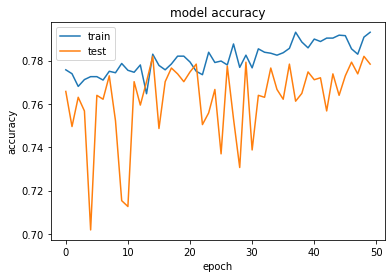

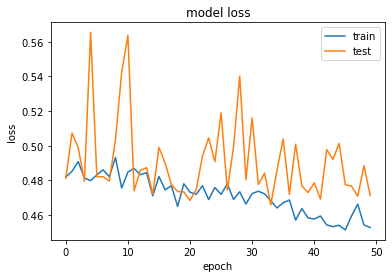

In [75]:
# visualize the results
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.4, 0.8)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.3, 0.80)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [76]:
score = model3.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #3 - accuracy:', score[1], '\n')

y_preds = model3.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #3 - accuracy: 0.77837837 

(1110, 2)
(1110,)
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       569
           1       0.78      0.76      0.77       541

    accuracy                           0.78      1110
   macro avg       0.78      0.78      0.78      1110
weighted avg       0.78      0.78      0.78      1110



Text(91.68, 0.5, 'true label or ground truth')

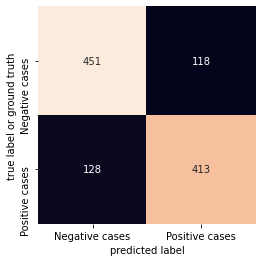

In [77]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

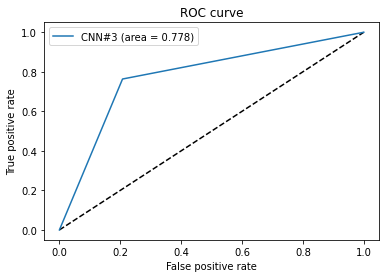

In [78]:
# plotting ROC 
fpr_cnn3, tpr_cnn3, thresholds_cnn3 = roc_curve(y_test, y_preds)
auc_cnn3 = auc(fpr_cnn3, tpr_cnn3)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn3, tpr_cnn3, label='CNN#3 (area = {:.3f})'.format(auc_cnn3))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The model3 did not improve on model2's performance; adding one more Conv2D layer and Maxpooling layer

In [79]:
model4 = Sequential()
model4.add(Conv2D(64, (3,3), input_shape=(50,50,3), activation='relu'))
model4.add(MaxPooling2D(2,2))
model4.add(Conv2D(64, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Conv2D(32, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Conv2D(32, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D(2, 2))
model4.add(Dropout(0.2))
model4.add(Flatten())
model4.add(Dense(units=512, activation='relu'))
model4.add(Dense(units=2, activation='sigmoid'))
# compiling
model4.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 48, 48, 64)        1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 9, 9, 32)          18464     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 2, 2, 32)         

In [80]:
datagen = ImageDataGenerator(
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        zoom_range=0.05,
        #shear_range=0.05,
        fill_mode='nearest'
  ) 
datagen.fit(X_train)

In [81]:
# adding a early stopping 
accuracy_threshold = 0.8000
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= accuracy_threshold) :
            print('\nReached 79% accuracy, stopping training!')
            self.model.stop_training = True
callbacks = myCallback()

In [82]:
history = model4.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=50, 
                    validation_data = (X_test, y_test), verbose = 2, callbacks=[callbacks], shuffle=False) 

  ...
    to  
  ['...']
Train for 45 steps, validate on 1110 samples
Epoch 1/50
45/45 - 7s - loss: 0.6812 - accuracy: 0.5702 - val_loss: 0.6818 - val_accuracy: 0.5324
Epoch 2/50
45/45 - 6s - loss: 0.6539 - accuracy: 0.6211 - val_loss: 0.6478 - val_accuracy: 0.6216
Epoch 3/50
45/45 - 6s - loss: 0.6419 - accuracy: 0.6459 - val_loss: 0.6219 - val_accuracy: 0.6955
Epoch 4/50
45/45 - 6s - loss: 0.6075 - accuracy: 0.6906 - val_loss: 0.6302 - val_accuracy: 0.6405
Epoch 5/50
45/45 - 6s - loss: 0.6086 - accuracy: 0.6725 - val_loss: 0.5937 - val_accuracy: 0.7198
Epoch 6/50
45/45 - 6s - loss: 0.5899 - accuracy: 0.7075 - val_loss: 0.6137 - val_accuracy: 0.6694
Epoch 7/50
45/45 - 6s - loss: 0.5809 - accuracy: 0.7108 - val_loss: 0.5546 - val_accuracy: 0.7324
Epoch 8/50
45/45 - 6s - loss: 0.5577 - accuracy: 0.7311 - val_loss: 0.5789 - val_accuracy: 0.7144
Epoch 9/50
45/45 - 6s - loss: 0.5740 - accuracy: 0.7133 - val_loss: 0.5717 - val_accuracy: 0.7207
Epoch 10/50
45/45 - 6s - loss: 0.5580 - accuracy

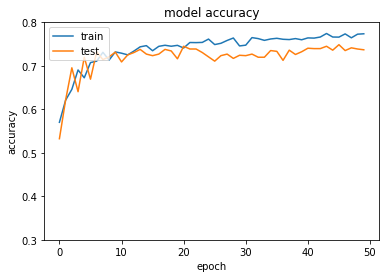

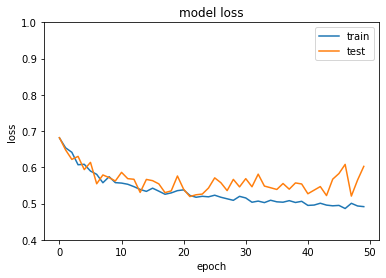

In [83]:
# visualize the results
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.3, 0.80)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0.4, 1)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [84]:
from sklearn.metrics import classification_report

score = model4.evaluate(X_test, y_test, verbose=0)

print('\nKeras CNN #4 - accuracy:', score[1], '\n')

y_preds = model4.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN #4 - accuracy: 0.7369369 

(1110, 2)
(1110,)
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       569
           1       0.81      0.61      0.69       541

    accuracy                           0.74      1110
   macro avg       0.75      0.73      0.73      1110
weighted avg       0.75      0.74      0.73      1110



Text(91.68, 0.5, 'true label or ground truth')

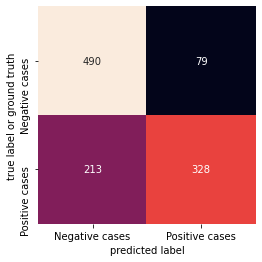

In [85]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')


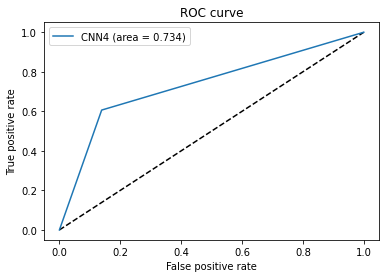

In [86]:
# plotting ROC 
fpr_cnn4, tpr_cnn4, thresholds_cnn4 = roc_curve(y_test, y_preds)
auc_cnn4 = auc(fpr_cnn4, tpr_cnn4)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn4, tpr_cnn4, label='CNN4 (area = {:.3f})'.format(auc_cnn4))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Adding new layers did not improve the model as model4 seems worse than model2 and model3. Let's explore ANN and RF

### ANN MODEL

In [87]:
print(X_train.shape)
print(X_test.shape)

(4437, 50, 50, 3)
(1110, 50, 50, 3)


In [88]:
#Reshape X_train & X_test
x_train = X_train.reshape(4437, 7500)
x_test = X_test.reshape(1110, 7500)
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test",x_test.shape)

print(x_train.shape[1])

Shape of x_train:  (4437, 7500)
Shape of x_test (1110, 7500)
7500


In [89]:
model5 = Sequential()
model5.add(Dense(32, input_dim=7500, activation='relu')) # max(0, x)
model5.add(Dense(32, activation='relu'))
model5.add(Dense(32, activation='relu')) 
model5.add(Dense(16, activation='relu'))
model5.add(Dense(2, activation='sigmoid'))
# compiling
model5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                240032    
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 34        
Total params: 242,706
Trainable params: 242,706
Non-trainable params: 0
_________________________________________________________________


In [90]:
history = model5.fit(x_train, y_train, batch_size=100, epochs=80, validation_data = (x_test, y_test), shuffle = False) 

Train on 4437 samples, validate on 1110 samples
Epoch 1/80
4437/4437 [==============================] - 1s 125us/sample - loss: 0.7023 - accuracy: 0.5190 - val_loss: 0.6784 - val_accuracy: 0.5162
Epoch 2/80
4437/4437 [==============================] - 0s 46us/sample - loss: 0.6736 - accuracy: 0.5815 - val_loss: 0.6755 - val_accuracy: 0.5468
Epoch 3/80
4437/4437 [==============================] - 0s 47us/sample - loss: 0.6396 - accuracy: 0.6398 - val_loss: 0.6580 - val_accuracy: 0.6207
Epoch 4/80
4437/4437 [==============================] - 0s 44us/sample - loss: 0.6056 - accuracy: 0.6795 - val_loss: 0.6348 - val_accuracy: 0.6450
Epoch 5/80
4437/4437 [==============================] - 0s 45us/sample - loss: 0.5800 - accuracy: 0.7052 - val_loss: 0.5572 - val_accuracy: 0.7279
Epoch 6/80
4437/4437 [==============================] - 0s 46us/sample - loss: 0.5625 - accuracy: 0.7205 - val_loss: 0.5372 - val_accuracy: 0.7369
Epoch 7/80
4437/4437 [==============================] - 0s 45us/sampl

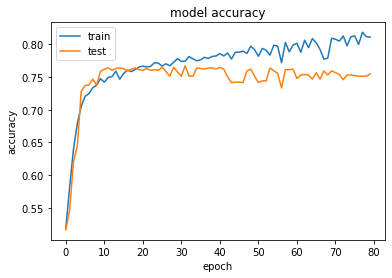

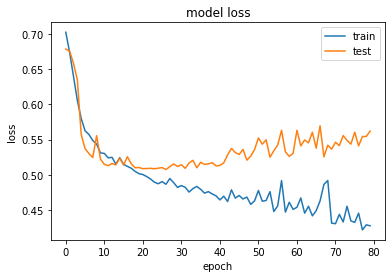

In [91]:
# visualize the results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5, 0.80)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.3, 0.80)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [92]:
score = model5.evaluate(x_test, y_test, verbose=0)

print('\nKeras ANN #1 - accuracy:', score[1], '\n')

y_preds = model5.predict(x_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras ANN #1 - accuracy: 0.75495493 

(1110, 2)
(1110,)
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       569
           1       0.74      0.78      0.76       541

    accuracy                           0.75      1110
   macro avg       0.76      0.76      0.75      1110
weighted avg       0.76      0.75      0.75      1110



Text(91.68, 0.5, 'true label or ground truth')

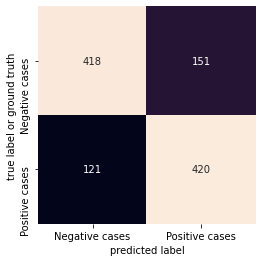

In [93]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

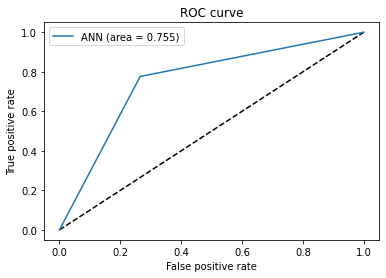

In [94]:
# plotting ROC 
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_preds)
auc_ann = auc(fpr_ann, tpr_ann)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_ann, tpr_ann, label='ANN (area = {:.3f})'.format(auc_ann))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

ann model iss overfitting...needs more data

### Random forest

Random Forest Classifier accuracy: 0.7531531531531531
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       569
           1       0.75      0.75      0.75       541

    accuracy                           0.75      1110
   macro avg       0.75      0.75      0.75      1110
weighted avg       0.75      0.75      0.75      1110



Text(91.68, 0.5, 'true label or ground truth')

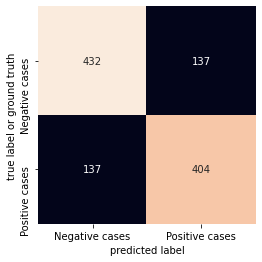

In [95]:
# Try classical machine learning model
#Random Forest Classifier
rforest_model = RandomForestClassifier(random_state=5, n_estimators= 40)
rforest_model.fit(x_train, y_train)
y_preds = rforest_model.predict(x_test)
rforest_accuracy = accuracy_score(y_test, y_preds)

# evaluate
print('Random Forest Classifier accuracy:', rforest_accuracy)
y_preds = rforest_model.predict(x_test)
print(classification_report(y_test, y_preds))

mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

In [104]:
# get prediction for train data
train_preds = rforest_model.predict(x_train)
print(accuracy_score(y_train, train_preds)) # could be due to overfitting

0.9995492449853505


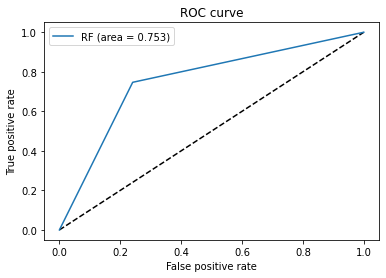

In [96]:
# plotting ROC 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_preds)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

RF model is overfitting, needs tuning, feature selection could be needed.

Let's build a deeper CNN model and compare with the simpler CNN model model2

In [22]:
model6 = Sequential()
model6.add(Conv2D(128, (3,3), input_shape=(50,50,3), activation='relu'))
model6.add(MaxPooling2D(2,2))
model6.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model6.add(MaxPooling2D(2, 2))
model6.add(Conv2D(64, (3, 3), activation = 'relu', padding='same'))
model6.add(MaxPooling2D(2, 2))
model6.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model6.add(MaxPooling2D(2, 2))
model6.add(Conv2D(32, (3, 3), activation = 'relu', padding='same'))
model6.add(MaxPooling2D(2, 2))
model6.add(Dropout(0.2))
model6.add(Flatten())
model6.add(Dense(units=512, activation='relu'))
model6.add(Dense(units=2, activation='sigmoid'))
# compiling
model6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 128)       3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 32)         

In [23]:
datagen = ImageDataGenerator(
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        zoom_range=0.05,
        #shear_range=0.05,
        fill_mode='nearest'
  ) 
datagen.fit(X_train)

In [24]:
# adding a early stopping 
accuracy_threshold = 0.8000
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}) :
        if(logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= accuracy_threshold) :
            print('\nReached 79% accuracy, stopping training!')
            self.model.stop_training = True
callbacks = myCallback()

In [26]:
history = model6.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=50, 
                    validation_data = (X_test, y_test), verbose = 2, callbacks=[callbacks], shuffle=False) 

  ...
    to  
  ['...']
Train for 42 steps, validate on 1387 samples
Epoch 1/50
42/42 - 12s - loss: 0.6904 - accuracy: 0.5462 - val_loss: 0.6669 - val_accuracy: 0.6518
Epoch 2/50
42/42 - 12s - loss: 0.6382 - accuracy: 0.6582 - val_loss: 0.6802 - val_accuracy: 0.6467
Epoch 3/50
42/42 - 12s - loss: 0.6112 - accuracy: 0.6856 - val_loss: 0.6096 - val_accuracy: 0.6662
Epoch 4/50
42/42 - 11s - loss: 0.6177 - accuracy: 0.6690 - val_loss: 0.5550 - val_accuracy: 0.7311
Epoch 5/50
42/42 - 12s - loss: 0.5681 - accuracy: 0.7284 - val_loss: 0.5724 - val_accuracy: 0.7203
Epoch 6/50
42/42 - 12s - loss: 0.5467 - accuracy: 0.7399 - val_loss: 0.5859 - val_accuracy: 0.6914
Epoch 7/50
42/42 - 12s - loss: 0.5461 - accuracy: 0.7397 - val_loss: 0.5475 - val_accuracy: 0.7304
Epoch 8/50
42/42 - 12s - loss: 0.5385 - accuracy: 0.7442 - val_loss: 0.5395 - val_accuracy: 0.7296
Epoch 9/50
42/42 - 12s - loss: 0.5293 - accuracy: 0.7550 - val_loss: 0.5046 - val_accuracy: 0.7599
Epoch 10/50
42/42 - 12s - loss: 0.5200 

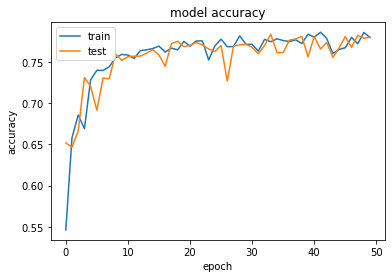

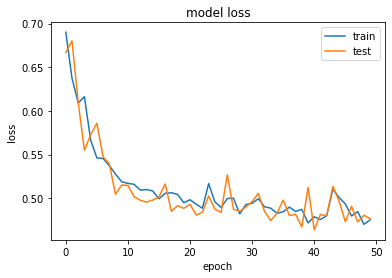

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.ylim(0.5, 0.80)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.3, 0.80)
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
score = model6.evaluate(X_test, y_test, verbose=0)
print('\nKeras CNN5 - accuracy:', score[1], '\n')

y_preds = model6.predict(X_test)
print(y_preds.shape) # which means the predictions return in one-hot encoding format
y_preds = np.argmax(y_preds, axis=1)
print(y_preds.shape)
print(classification_report(y_test, y_preds))
conf_matx = confusion_matrix(y_test, y_preds)


Keras CNN5 - accuracy: 0.78010094 

(1387, 2)
(1387,)
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       712
           1       0.73      0.87      0.79       675

    accuracy                           0.78      1387
   macro avg       0.79      0.78      0.78      1387
weighted avg       0.79      0.78      0.78      1387



Text(91.68, 0.5, 'true label or ground truth')

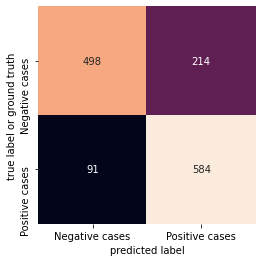

In [30]:
mat = confusion_matrix(y_test, y_preds)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Negative cases', 'Positive cases'], yticklabels=['Negative cases', 'Positive cases'])
plt.xlabel('predicted label')
plt.ylabel('true label or ground truth')

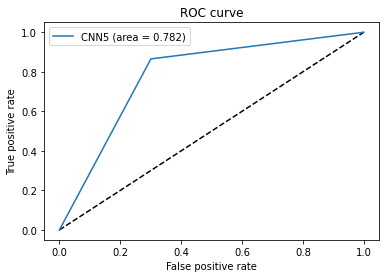

In [32]:
# plotting ROC 
fpr_cnn5, tpr_cnn5, thresholds_cnn5 = roc_curve(y_test, y_preds)
auc_cnn5 = auc(fpr_cnn5, tpr_cnn5)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn5, tpr_cnn5, label='CNN5 (area = {:.3f})'.format(auc_cnn5))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

The model6 performance is actually better than all other CNN model except model2. It has comparable FN and TP.

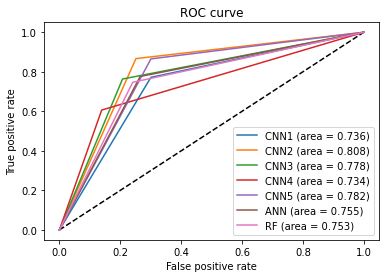

In [100]:
# plot ROC for the all the models
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn1, tpr_cnn1, label='CNN1 (area = {:.3f})'.format(auc_cnn1))
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN2 (area = {:.3f})'.format(auc_cnn2))
plt.plot(fpr_cnn3, tpr_cnn3, label='CNN3 (area = {:.3f})'.format(auc_cnn3))
plt.plot(fpr_cnn4, tpr_cnn4, label='CNN4 (area = {:.3f})'.format(auc_cnn4))
plt.plot(fpr_cnn5, tpr_cnn5, label='CNN5 (area = {:.3f})'.format(auc_cnn5))
plt.plot(fpr_ann, tpr_ann, label='ANN (area = {:.3f})'.format(auc_ann))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

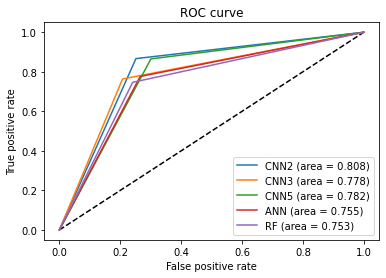

In [101]:
# plot ROC for some of the models
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN2 (area = {:.3f})'.format(auc_cnn2))
plt.plot(fpr_cnn3, tpr_cnn3, label='CNN3 (area = {:.3f})'.format(auc_cnn3))
plt.plot(fpr_cnn5, tpr_cnn5, label='CNN5 (area = {:.3f})'.format(auc_cnn5))
plt.plot(fpr_ann, tpr_ann, label='ANN (area = {:.3f})'.format(auc_ann))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

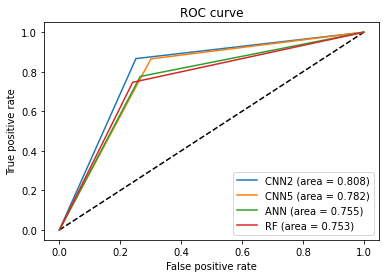

In [102]:
# plot ROC for some of the models
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_cnn2, tpr_cnn2, label='CNN2 (area = {:.3f})'.format(auc_cnn2))
plt.plot(fpr_cnn5, tpr_cnn5, label='CNN5 (area = {:.3f})'.format(auc_cnn5))
plt.plot(fpr_ann, tpr_ann, label='ANN (area = {:.3f})'.format(auc_ann))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Conclusion
CNN model2 and model6 are the best performing models for this dataset
More training data is needed to get better predictions